This excercise is from the course **Machine Learning with Python** from Coursera Lab: Simple_LinearRegression
 [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01)

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#ImportPackages">Import the packages/a></li>
        <li><a href="https://#polynomial_regression"> Import , read , and explore the Data</a></li>
        <li><a href="https://#evaluation">Split the dataset in training and testing</a></li>
        <li><a href="https://#practice">Evaluate the model</a></li>
    </ol>
</div>
<br>
<hr>


#### 1. Import the packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pandas.plotting as pd_plot  
import pylab as pl
import numpy as np
import seaborn as sns  
from sklearn import linear_model #Supervised model to be used in this excercise
from sklearn.preprocessing import PolynomialFeatures #Polynomial model
%matplotlib inline
#import os  to set a directory
#os.chdir("c:/PGE383")   

#### 2. Import , read , and explore the Data

In [2]:
df = pd.read_csv("FuelConsumption.csv")
# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
#Create a subdata set with the features in which we are interested
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


#### Explore the data using Matrix Scatter Plots

For more complete information, let's look at the matrix scatter plot from the Pandas package. 

```python
pd_plot.scatter_matrix(my_data)
```

the $alpha$ alows us to use semitransprent points for easier visualization with dense scatter plots.

the $hist_kwds$ is a set of parameters for the histograms on the diagonal elements.


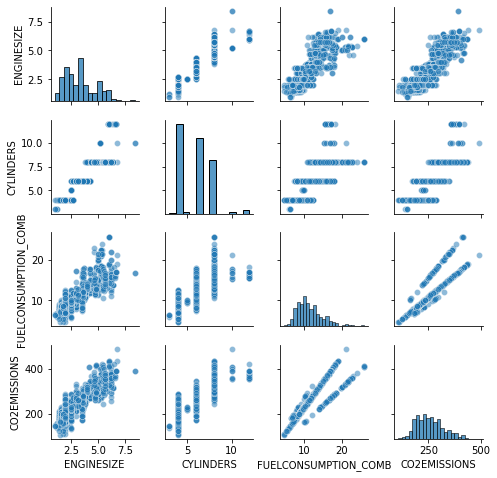

In [5]:
#matrix scatter plot
sns.pairplot(cdf,markers='o',plot_kws={'alpha': 0.5})
plt.subplots_adjust(left=0.0, bottom=0.0, right=0.6, top=0.6, wspace=0.3, hspace=0.2)
plt.show()

#Same plot but using pandas
#pd_plot.scatter_matrix(cdf, alpha = 0.3,             
 #   figsize=(9, 10),color = 'orange', hist_kwds={'color':['orange']})
#plt.show()

### 3. Split the dataset in training and testing

Train/Test Split involves splitting the dataset into training and testing sets that are mutually exclusive. After which, you train with the training set and test with the testing set.
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the model. Therefore, it gives us a better understanding of how well our model generalizes on new data.

This means that we know the outcome of each data point in the testing dataset, making it great to test with! Since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using **np.random.rand()** function:

In [6]:
msk = np.random.rand(len(df)) < 0.8 #Select at random 80% of the data for training
train = cdf[msk]
test = cdf[~msk] #The raimaning data 20% is assigned to testing

When we explored the data we observed a kind of linear relation between EngineSize and CO2 Emissions, so this will be our first linear regression model and we can try with FuelComsumption and CO2 Emissions

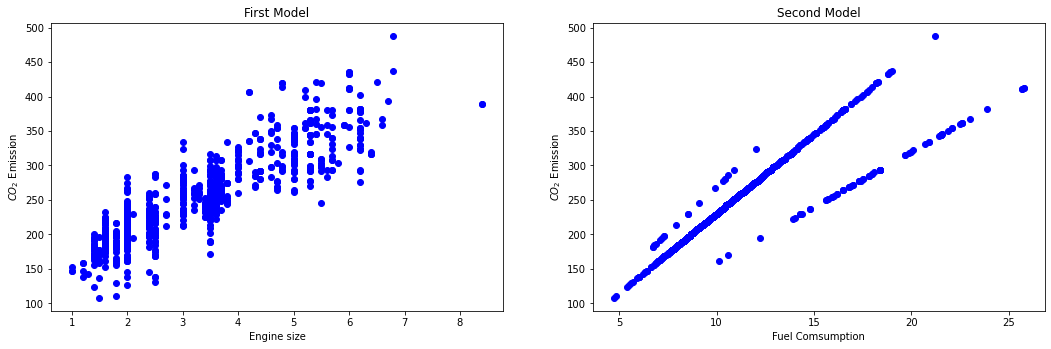

In [7]:
plt.subplot(121)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size"); plt.ylabel("$CO_{2}$ Emission"); plt.title("First Model")

plt.subplot(122)
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Fuel Comsumption"); plt.ylabel("$CO_{2}$ Emission"); plt.title("Second Model")

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.3, top=1, wspace=0.2, hspace=0.3)
plt.show()

### 4. Train the model

In [8]:
regr1 = linear_model.LinearRegression()
train_x1 = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr1.fit(train_x1, train_y)
# The coefficients
print ('Coefficients (first model): %.3f ' % regr1.coef_[0][0])
print ('Intercept (first model): %.3f ' %regr1.intercept_[0])

regr2 = linear_model.LinearRegression()
train_x2 = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr2.fit(train_x2, train_y)
# The coefficients
print ('Coefficients (second model): %.3f ' % regr2.coef_[0][0])
print ('Intercept(second model): %.3f ' %regr2.intercept_[0])

Coefficients (first model): 38.834 
Intercept (first model): 126.258 
Coefficients (second model): 15.847 
Intercept(second model): 72.319 


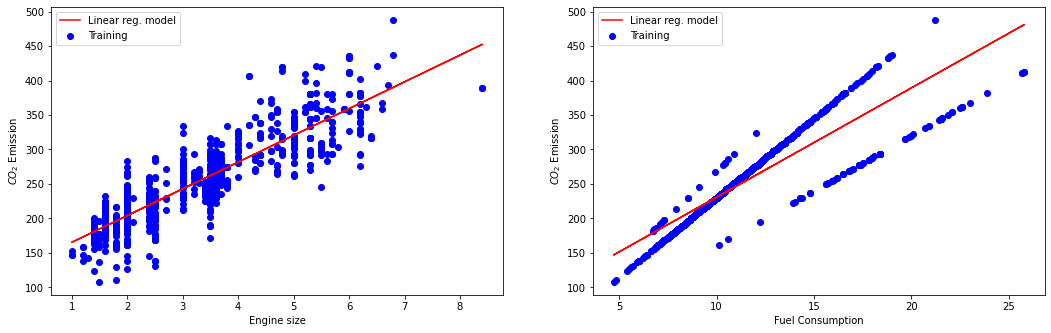

In [9]:
#Plot the model 
plt.subplot(121)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue', label="Training")
plt.plot(train_x1, regr1.coef_[0][0]*train_x1 + regr1.intercept_[0], '-r', label="Linear reg. model")
plt.xlabel("Engine size"); plt.ylabel("$CO_{2}$ Emission"); plt.legend();

plt.subplot(122)
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color='blue', label="Training")
plt.plot(train_x2, regr2.coef_[0][0]*train_x2 + regr2.intercept_[0], '-r', label="Linear reg. model")
plt.xlabel("Fuel Consumption"); plt.ylabel("$CO_{2}$ Emission"); plt.legend();

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.3, top=1, wspace=0.2, hspace=0.3)
plt.show()

### 5. Evaluate the model with the testing data

In [10]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) #Real Value
test_y_ = regr1.predict(test_x) #Predicted Value

print("Mean absolute error: %.3f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.3f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.3f" % r2_score(test_y , test_y_) )

Mean absolute error: 22.620
Residual sum of squares (MSE): 946.230
R2-score: 0.765


In [11]:
test_x2 = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) #Real Value
test_y2_ = regr2.predict(test_x2) #Predicted Value

print("Mean absolute error: %.3f" % np.mean(np.absolute(test_y2_ - test_y)))
print("Residual sum of squares (MSE): %.3f" % np.mean((test_y2_ - test_y) ** 2))
print("R2-score: %.3f" % r2_score(test_y , test_y2_) )

Mean absolute error: 19.884
Residual sum of squares (MSE): 752.552
R2-score: 0.813


### Multiple Linnear Regression

In [12]:
regr3 = linear_model.LinearRegression()
x3 = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr3.fit (x3, y)
# The coefficients
print ('Coefficients: ', regr3.coef_)

Coefficients:  [[11.23384758  7.53562338  9.24841286]]


In [13]:
y_hat= regr3.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x3 = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr3.score(x3, y))
print("R2-score: %.2f" % r2_score(y , y_hat) )


Residual sum of squares: 537.17
Variance score: 0.87
R2-score: 0.87


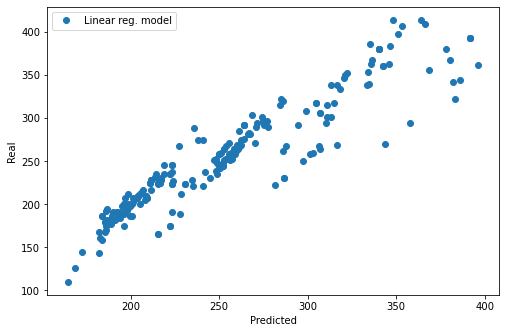

In [14]:
#Plot the model 
plt.subplot(121)
#plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue', label="Training")
plt.plot(y_hat, y, 'o', label="Linear reg. model")
plt.xlabel("Predicted"); plt.ylabel("Real"); plt.legend();
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.3, top=1, wspace=0.2, hspace=0.3)
plt.show()


### Polynomial Regression

In [15]:
poly = PolynomialFeatures(degree=2)
train_x4 = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
train_x_poly = poly.fit_transform(train_x4)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [16]:
clf=linear_model.LinearRegression()
train_y_=clf.fit(train_x_poly, train_y)
print('Coefficients: ', clf.coef_)
print('CIntercept: ', clf.intercept_)

Coefficients:  [[ 0.         51.17866663 -1.64779904]]
CIntercept:  [106.72165447]


Text(0, 0.5, 'Emission')

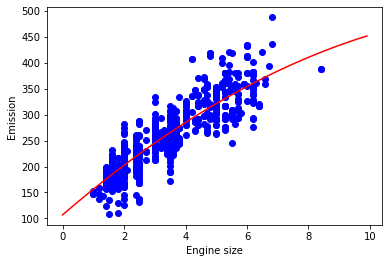

In [17]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [18]:
test_x_poly = poly.transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,test_y_ ) )

Mean absolute error: 22.80
Residual sum of squares (MSE): 947.40
R2-score: 0.76
